# World Happiness Score

In this project, I analyzed happiness scored according to social support, freedom, health facilities etc. I used "The World Happiness Report" which explain survey of the global happiness. In 2012 first the World Happiness Report was published. In 2017, World Happiness Report was released at the United Nations when International Day of Happiness celebrating. 

Our aims are analyzed two details about happiness score. These are;

1. What are the top 10 happiest countries in the world? 

2. What are the variables that have high relationship with countries' happiness score?


In the following steps, examinations were made for these questions.

Source:

https://www.kaggle.com/unsdsn/world-happiness?select=2017.csv


# 1.Data Understanding

I used “World Happiness Report” dataset from Kaggle platform. The dataset has got 155 rows and 13 columns. It explains happiness scores according to countries. 

Dependent variables are Happiness Rank, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual and Country. They can be explain happiness scores.


Independent variable is Happiness Score. The report is survey of the global happiness. The dataset has got 155 different countries. In this project, the happiness score’s observations belong to 2017. The happiness scores are calculated based on answers about the main life. In 2016, happines score measured. It's scale 0 to 10. 10 is the happiest countries. 


In [38]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import folium
import datetime as DT
import hmac
import matplotlib.pyplot as plt
import seaborn as sns
import html5lib
import plotly.express as px

from folium import plugins
from folium.plugins import HeatMap
from geopy import distance
from geopy.geocoders import Nominatim
from scipy.stats import pearsonr
from IPython.display import display, HTML
geolocator = Nominatim(user_agent="http")
py.init_notebook_mode(connected=True)


In [5]:
#load data
data_2017=pd.read_csv("world_happiness_score_2017.csv")

In [6]:
data_2017.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [34]:
#find of len row and column
print("Shape of data: ", data_2017.shape)

Shape of data:  (155, 13)


In [35]:
#find data types
data_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
row_perc_null                    float64
dtype: object

In [9]:
#find mean, std, max, min values
def descriptive(data):
    
    """
    Find descriptive statistics result for all columns
    Descriptive statistics(mean, std, count etc.)
    
    Parameters:
    data (dataframe): the data set we will look at descriptive statistics
    
    Returns:
    data_describe(dataframe): show details for all columns
    
    """
    data_describe=data.describe().transpose()
    
    return data_describe

In [10]:
#calculate descriptive statistic results
descriptive(data_2017)

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


In [11]:
def graph(x,y, x_title, y_title):
    
    """
    grahp for features according to countries
    
    Parameters:
    x= x axis values
    y= y axis values
    x_title= x axis title
    y_title= y axis title
    
    Returns:
    graph
    

    """

    data=[]
    trace = go.Scatter(
     x = x,
     y = y,
    mode = 'markers+lines',
    marker = dict(
        size = 10,
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0)'
            
        )))

    plot1 = [trace]
    data=[trace]

    layout = {
      'xaxis': {'title': x_title},
      'yaxis': {'title': y_title},
      }
    

    return py.iplot({'data': data, "layout":layout})

In [36]:
#Graph of happiness score according to countries 
graph(data_2017["Country"], data_2017["Happiness.Score"], "Country", "Happiness.Score")

Observation Results:

1. Happiness score column give answer for how would you rate your happiness on a scale of 0 to 10. 

2. The best score is 10. The mean of happiness score is 5,35. 

3. Standard deviation of happiness score is 1,13.

4. Maximum value is 8 (Norway), minimum value is 3 (Central African Republic). The best three happiest countries are Norway, Denmark and Iceland. 



In [37]:
#Graph of happiness score according to countries 
graph(data_2017["Country"], data_2017["Happiness.Rank"], "Country", "Happiness.Rank")

Observation Results:


1. Happiness rank variable is rank of the country based on the Happiness Score. 

2. Top 10 list: Norway, Denmark, Iceland, Switzerland, Finland, Netherlands, Canada, New Zealand, Australia, Sweden. 

3. Bottom 10 list: Yemen, South Sudan, Liberia, Guinea, Togo, Rwanda, Syria, Tanzania, Burundi, Central African Republic.

In [13]:
#Graph of Economy.GDP.per.Capita. score according to countries 
graph(data_2017["Country"], data_2017["Economy..GDP.per.Capita."], "Country", "Economy..GDP.per.Capita.")

Observation Results:


1. Economy/ GDP column describes indicator for country’s standard of living conditions.

2. Mean of the standard error is 0,98. Standard deviation is 0,42. 

3. Maximum value is 1,87.

In [14]:
#Graph of Whisker.high score according to countries 
graph(data_2017["Country"], data_2017["Whisker.high"], "Country", "Whisker.high")

In [12]:
#Graph of freedom score according to contries 
graph(data_2017["Country"], data_2017["Freedom"], "Country", "Freedom")

Observation Results:


1. Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption variables are contributed in evaluating the happiness score in each country. 


2. Dystopia column describe imaginary country. It has got the world’s least-happy people. The aim of the Dystopia is compare countries based on independent variables.


     “The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.” *
   
   
 Source:
 
 * https://www.kaggle.com/unsdsn/world-happiness/home


NORMALITY TEST

Normality test provides to check if the variable is normally distributed or not. If the variable is normally distributed, I used the parametric statistics tests. Otherwise I use non-parametric tests. In this work, I plotted histogram of all variables. Then I created hypothesis for normality test. I used Shapiro-Wilk test, and calculated p-values.

H0: The sample data are not significantly different than a normal population.

H1: The sample data are significantly different than a normal population.

Probabilities > 0.05 mean the data are normal. 

Probabilities < 0.05 mean the data are not normal.


In [15]:
#apply normality test
from scipy.stats import shapiro
from scipy import stats
data_test=data_2017.drop("Country", axis=1)
data_test.apply(lambda x: pd.Series(shapiro(x), index=['W','P']))

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
W,0.954613,0.982920,0.982815,0.983597,0.969770,9.115216e-01,0.946023,0.959454,0.957829,8.390202e-01,0.981271
P,0.000061,0.052229,0.050759,0.062798,0.001749,4.186055e-08,0.000011,0.000167,0.000118,9.204047e-12,0.033412


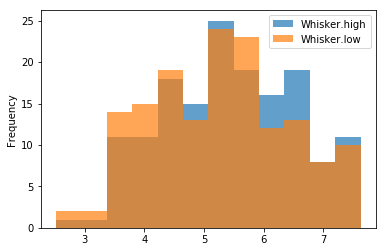

In [16]:
#histogram for "Whisker.high" and "Whisker.low"
data_2017[["Whisker.high", "Whisker.low"]].plot.hist(bins=12, alpha=0.7)

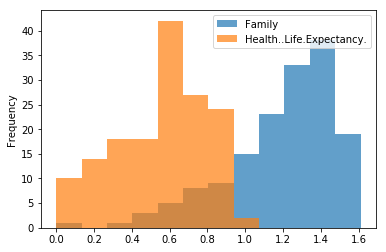

In [17]:
#histogram for "Family" and "Health..Life.Expectancy."
data_2017[["Family", "Health..Life.Expectancy."]].plot.hist(bins=12, alpha=0.7)

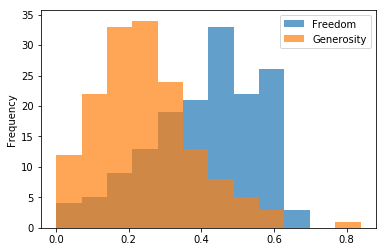

In [18]:
#histogram for "Freedom" and "Generosity"
data_2017[["Freedom", "Generosity"]].plot.hist(bins=12, alpha=0.7)

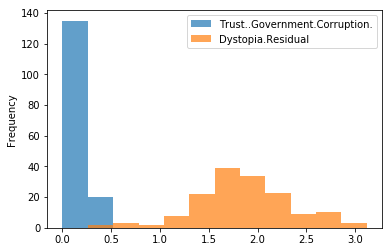

In [19]:
#histogram for "Trust..Government.Corruption." and "Dystopia.Residual"
data_2017[["Trust..Government.Corruption.", "Dystopia.Residual"]].plot.hist(bins=12, alpha=0.7)

Observation Results

1. Happiness.Score: P:0.052>0.05. H0 is accepted, variable is distributed normal


2. Whisker.high: P:0.0507>0.05. H0 is accepted, variable is distributed normal


3. Whisker.low:  P:0.06>0.05. H0 is accepted, variable is distributed normal


4. Economy..GDP.per.Capita: P: 0.001<0.05. H0 is rejected, variable is not distributed normal


5. Family: P: 4.186e-08<0.05. H0 is rejected, variable is not distributed normal


6. Health..Life.Expectancy: P:0.00<0.05. H0 is rejected, variable is not distributed normal


7. Freedom: P: 0.00<0.05. H0 is rejected, variable is not distributed normal


8. Generosity: P: 0.00<0.05. H0 is rejected, variable is not distributed normal


9. Trust..Government.Corr.: P: 9.204e-12<0.05. H0 is rejected, variable is not distributed normal


10. Dystopia.Residual: P:0.033<0.05. H0 is accepted, variable is distributed normal




Result of normality test: 
Variables are distributed normal: Happiness.Score, Whisker.high, Whisker.low, Dystopia.Residual

Variables are not distributed normal: Happiness.Rank, Economy..GDP.per.Capita., Family Health..Life.Expectancy, Freedom, Generosity, Trust..Government.Corr.






# 2. Prepare Data

In [20]:
#check null values for each columns
data_2017.isnull().sum().sort_values(ascending=False)

Dystopia.Residual                0
Trust..Government.Corruption.    0
Generosity                       0
Freedom                          0
Health..Life.Expectancy.         0
Family                           0
Economy..GDP.per.Capita.         0
Whisker.low                      0
Whisker.high                     0
Happiness.Score                  0
Happiness.Rank                   0
Country                          0
dtype: int64

In [21]:
#calculate mean of missing values for each rows
data_2017["row_perc_null"]=data_2017.isnull().mean(axis=1)
data_2017["row_perc_null"].head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: row_perc_null, dtype: float64

In [22]:
#check all columns 
def check_data(data):
    """
    control data types, if all columns are integer, data is ready
    
    Parameter:
    data: check this data
    
    Return:
    print text according to result
    
    """
    
    data=data.drop("Country", axis=1)
    control=data._get_numeric_data()

    c1=control.columns
    c2=data.columns

    if len(c1.intersection(c2)) == len(c2):
        print("data is ready")
    else:
        print("check again")

In [23]:
check_data(data_2017)

data is ready


Observation Results


1. I checked missing values for columns and rows.

2. There are no missing values in the data set.

# 3. Modeling

# Q1: What are the top 10 happiest countries in the world? 

In this section, heatmap created for the happiest 10 countries on the world map.

In [24]:
#find top 10 countiries which has highest happiness score
data_2017.sort_values(by= "Happiness.Score", ascending=False).head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,row_perc_null
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0.0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0.0
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,0.0
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,0.0
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,0.0
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,0.0
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,0.0


In [40]:
#find top 10 countiries which has lowest happiness score
data_2017.sort_values(by= "Happiness.Score", ascending=False).tail(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,row_perc_null
145,Yemen,146,3.593,3.692750,3.493250,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,0.0
146,South Sudan,147,3.591,3.725539,3.456462,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,0.0
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,0.0
148,Guinea,149,3.507,3.584428,3.429572,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,0.0
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,0.0
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,0.0
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,0.0
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,0.0
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,0.0
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,0.0


In [25]:
#find heatmap for top 10 happiest countries
def top_10(data):
    
    """
    create world map and find heatmap based on Happiness Score/Country
    
    Parameters:
    data: world happiness report 
    
    Return:
    Heatmap graph
    
    """
    #determine columns
    data_top=data[["Country", "Happiness.Score"]].sort_values(by="Happiness.Score", ascending=False).head(10)
    data_top=data_top.reset_index()
    #m = folium.Map([41.8781, -87.6298], zoom_start=11);m
    
    #create empty list
    a=[]
    b=[]
    
    
    #find location of countries
    for i in range(10):
        location = geolocator.geocode(data_top["Country"][i])
        print((location.latitude, location.longitude))
        a.append(location.latitude)
        b.append(location.longitude)
        
    data_top['Lat'] = a
    data_top['Long'] = b
    data_top["name"]=data_top["Country"]
    
    coordinates = (data_top['Lat'][1], data_top['Long'][1])
    
    #create map
    m = folium.Map(location= coordinates, zoom_start=12)
    for index, row in data_top.iterrows():
        folium.CircleMarker([row['Lat'], row['Long']],
                        radius=15,
                        popup=row['Country'], parse_html=True,
                        fill_color="008000", 
                       ).add_to(m)


    # convert to (n, 2) nd-array format for heatmap
    stationArr = data_top[['Lat', 'Long']].as_matrix()
    HeatMap(stationArr).add_to(m)

    # plot heatmap
    m.add_child(plugins.HeatMap(stationArr, radius=10))

    return m

In [26]:
top_10(data_2017)

(64.5731537, 11.52803643954819)
(55.670249, 10.3333283)
(64.9841821, -18.1059013)
(46.7985624, 8.2319736)
(63.2467777, 25.9209164)
(52.5001698, 5.7480821)
(61.0666922, -107.9917071)
(-41.5000831, 172.8344077)
(-24.7761086, 134.755)
(59.6749712, 14.5208584)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



According to The World Happiness Report, top 10 happiest countries;

1. Norway
2. Denmark
3. Iceland 
4. Switzerland
5. Finland
6. Netherlands
7. Canada
8. New Zealand
9. Australia
10. Sweden

According to The World Happiness Report, top 10 happiest countries;

1. Yemen
2. South Sudan
3. Liberia
4. Guinea
5. Togo
6. Rwanda
7. Syria
8. Tanzania
9. Burundi
10. Central African Republic


# Q2: What are the variables that have high relationship with countries' happiness score?

In this part, I analyzed relationship between columns. Correlation test explains relationship between two variables. If variables are distributed normally, Pearson correlation coefficient test is used. Otherwise Spearman’s rank correlation coefficient test is used for not normal distribution. In this work, I used Pearson and Spearman based on distribution of variables. 

PEARSON CORRELATION TEST

Pearson correlation test is used for find correlation coefficient between Happiness.Score, Whisker.high, Whisker.low and Dystopia.Residual variables. And created H0 and H1;

H0: Population correlation equals 0 / ρ = 0

H1: Population correlation not equals 0 / p ≠ 0.

Source:
https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/

In [27]:
#apply Pearson correlation 
data_2017[["Happiness.Score", "Whisker.high", "Whisker.low", "Dystopia.Residual"]].corr(method='pearson')

,Happiness.Score,Whisker.high,Whisker.low,Dystopia.Residual
Happiness.Score,1.000000,0.999497,0.999520,0.475355
Whisker.high,0.999497,1.000000,0.998036,0.478824
Whisker.low,0.999520,0.998036,1.000000,0.471505
Dystopia.Residual,0.475355,0.478824,0.471505,1.000000


Observation Results:


1. Whisker high and whisker low variables are constituted from Happiness Score. It follows from this, happiness score and whisker high/low coefficient value is 0,999. 


2. Happiness Score and Dystopia residual coefficient value is 0,48. They have got a positive relation. P value is smaller than 0.05. H0 is rejected, happiness score and dystopia have got significant relation. 

  SPEARMAN CORRELATION TEST

Spearman correlation test is used for find correlation coefficient between Economy..GDP.per.Capita., Freedom, Whisker.low, Family and Health..Life.Expectancy. variables. And created H0 and H1;

H0: Population correlation equals 0 / ρ = 0

H1: Population correlation not equals 0 / p ≠ 0.

In [28]:
#apply Spearman correlation
data_2017[["Economy..GDP.per.Capita.", "Freedom", 
           "Happiness.Score", "Family","Health..Life.Expectancy."]].corr(method='spearman')

,Economy..GDP.per.Capita.,Freedom,Happiness.Score,Family,Health..Life.Expectancy.
Economy..GDP.per.Capita.,1.000000,0.406784,0.824992,0.711866,0.856650
Freedom,0.406784,1.000000,0.556133,0.477790,0.356579
Happiness.Score,0.824992,0.556133,1.000000,0.773619,0.787647
Family,0.711866,0.477790,0.773619,1.000000,0.631133
Health..Life.Expectancy.,0.856650,0.356579,0.787647,0.631133,1.000000


Observation Results:



1. Economy GDP per capita variable is distributed not normal. For this reason, Spearman test is used. Between two variables, correlation coefficient is 0.82; positive very strong relation. P value is smaller than 0.05. H0 is rejected, happiness score and economy GDP Per Capita have got significant relation. 


2. Freedom variable is distributed not normal. Thus, spearman test is used. Happiness score and freedom correlation coefficient is 0.56. P value is smaller than 0.05. H0 is rejected, happiness score and freedom have got significant relation. 


3. Family variable is distributed not normal. For this reason, spearman test is used. Happiness score and family correlation coefficient is 0.77; positive strong relation. P value is smaller than 0.05. H0 is rejected, happiness score and freedom have got significant relation. 


4. Health life expectancy variable is distributed not normal. For this reason, spearman test is used. Happiness score and health life expectancy correlation coefficient is 0.79; positive strong relation. P value is smaller than 0.05. H0 is rejected, happiness score and health life expectancy have got significant relation. 

In [29]:
#graphed correlation heat map
def correlation(data):
    """
    Find correlation between all columns/features
    
    Parameters:
    data (dataframe): describe the data set we will look at correlation
    
    Returns:
    heatmap graph: correlation results, heatmap graph
    
    """
    
    #set figure size
    plt.figure(figsize=(15,15))
    #plot heatmap
    sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,fmt = ".2f",cbar=False)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    #define tittle
    plt.title('Correlation Map')
    
    return plt.show()

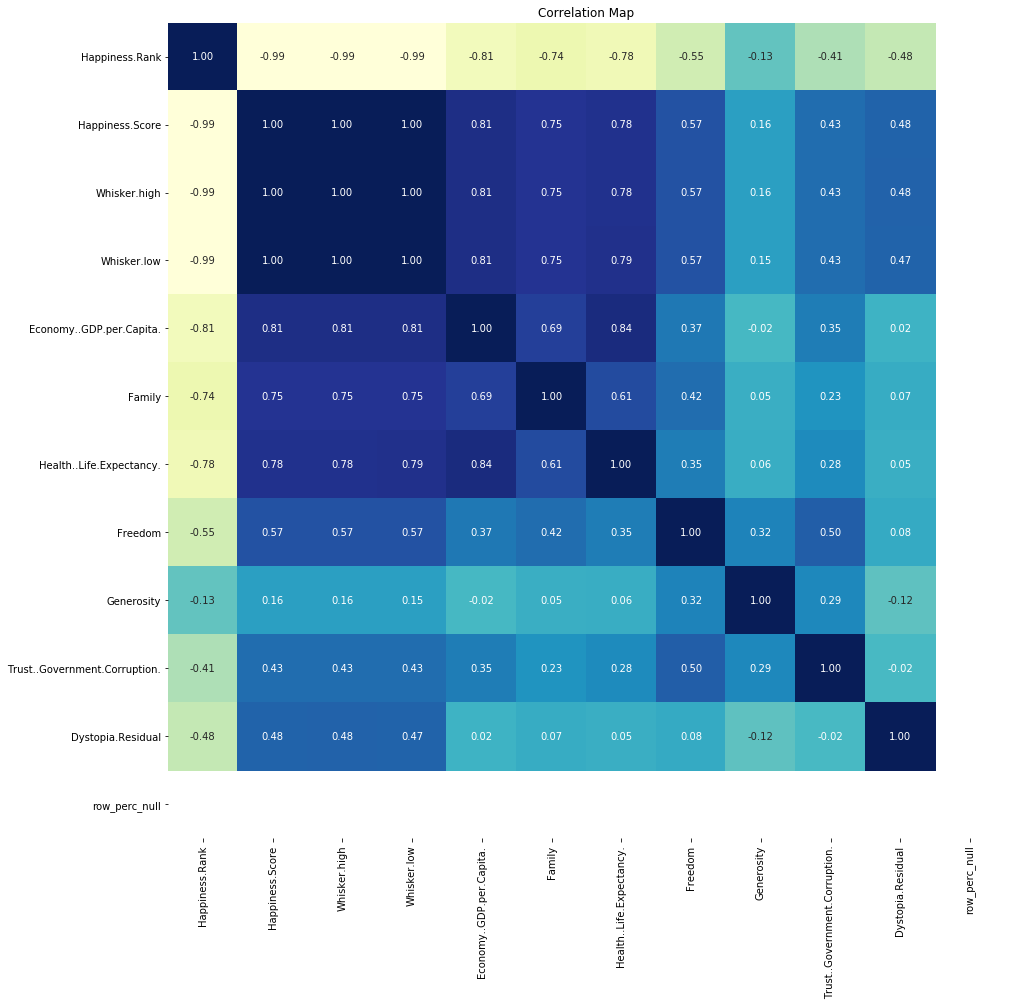

In [30]:
correlation(data_2017)

In [42]:
def animation_graph_1():
    
    """
    Create animation graph for Happiness.Score and Health Life Expectancy according to country
    
    Parameter:
    None
    
    Return:
    animation graph
    
    """
    #create data frame
    data_f= data_2017[["Country", "Happiness.Score", "Health..Life.Expectancy."]]
    
    #determine details 
    fig=px.scatter(data_f, x="Happiness.Score", y="Health..Life.Expectancy.", animation_frame="Country", 
                   animation_group="Country",
           size=data_f["Happiness.Score"]*1000,color="Country",
           log_x=True,log_y=False,size_max=200, range_x=[1,10], range_y=[1,5])
    fig.show()
    

In [43]:
#plot animation graph
animation_graph_1()

In [48]:
def animation_graph_2():
    
    """
    Create animation graph for Happiness.Score and Whisker.high according to country
    
    Parameter:
    None
    
    Return:
    animation graph
    
    """
    #create data frame
    data_f= data_2017[["Country", "Happiness.Score", "Whisker.high"]]
    
    #determine details
    fig=px.scatter(data_f, x="Happiness.Score", y="Whisker.high", animation_frame="Country", 
                   animation_group="Country",
           size=data_f["Happiness.Score"]*100,color="Country",
           log_x=True,log_y=False,size_max=200, range_x=[1,10], range_y=[1,10])
    fig.show()

In [49]:
#plot animation graph
animation_graph_2()

# 4. Evaluation


Finally, I analyzed all details about dataset. The happiest and most unhappy countries were determined. Relationship was examined between dependent and independent variables.




